In [16]:
#This porgrams generates the matrix of connections between the groups of neurons
#FIG.1 of the paper

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize

In [18]:
#Importing some info I need for this program
G=np.loadtxt('general_files/G.txt') #global factor coupling
#print(G)

#Import the strenght of connections and the connections probabilities 
Cp = np.loadtxt('import_files/connectionsPro.txt')
Cs=np.loadtxt('import_files/connectionsStren.txt')
#print(Cp)
#print(Cs)

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")

The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [19]:
targets=[[0,0],[0,1],[0,2],[0,3],
        [1,0],[1,1],[1,2],[1,3],
        [2,0],[2,1],[2,2],[2,3],
        [3,0],[3,1],[3,2],[3,3]]
sources=[[0,0],[0,1],[0,2],[0,3],
        [1,0],[1,1],[1,2],[1,3],
        [2,0],[2,1],[2,2],[2,3],
        [3,0],[3,1],[3,2],[3,3]]

#I initialize the matrices 
#matrix will contain the strneght of single synapse (different for each pair of groups)
strengh_co= [[0 for x in range(0,len(sources))] for y in range(0,len(targets))] #create matrix filled with 0 
#matrix will contain the number of connections (different for each pair of groups)
n_in_co= [[0 for x in range(0,len(sources))] for y in range(0,len(targets))] #create matrix filled with 0 

#matrix to be plotted at the end
measure_co= [[0 for x in range(0,len(sources))] for y in range(0,len(targets))]  #create matrix filled with 0 
#measure_co_PAPER= [[0 for x in range(0,len(sources))] for y in range(0,len(targets))]  #create matrix filled with 0 

for h in range(len(sources)):
    for k in range(len(targets)):
        s_layer = sources[h][0] #source layer
        s_cell_type = sources[h][1] #source cell type
        t_layer = targets[k][0] #target layer
        t_cell_type = targets[k][1] #target cell type
        
        #number of connections targeting the group
        n_in=Cp[4*s_layer+s_cell_type][4*t_layer+t_cell_type]*N[s_layer][s_cell_type]
        n_in_co[h][k]=n_in

        #strenght of connection G*s/p*Nsend (s and p are taken from matrix Cs and Cp)
        if Cp[4*s_layer+s_cell_type][4*t_layer+t_cell_type]==0:
            streng_conn=0
        else:
            streng_conn=G*Cs[4*s_layer+s_cell_type][4*t_layer+t_cell_type]/(Cp[4*s_layer+s_cell_type][4*t_layer+t_cell_type]*N[s_layer][s_cell_type])
                        
        strengh_co[h][k]=streng_conn
        
#value to put in the final matrix: strenght of single connection * number of incoming connectios
for h in range(0,16):
    for k in range(0,16):
        measure_co[h][k]= n_in_co[h][k]*strengh_co[h][k]
        #measure_co_PAPER[h][k]= G*Cs_vis[h][k]

In [20]:
#FINAL PLOT

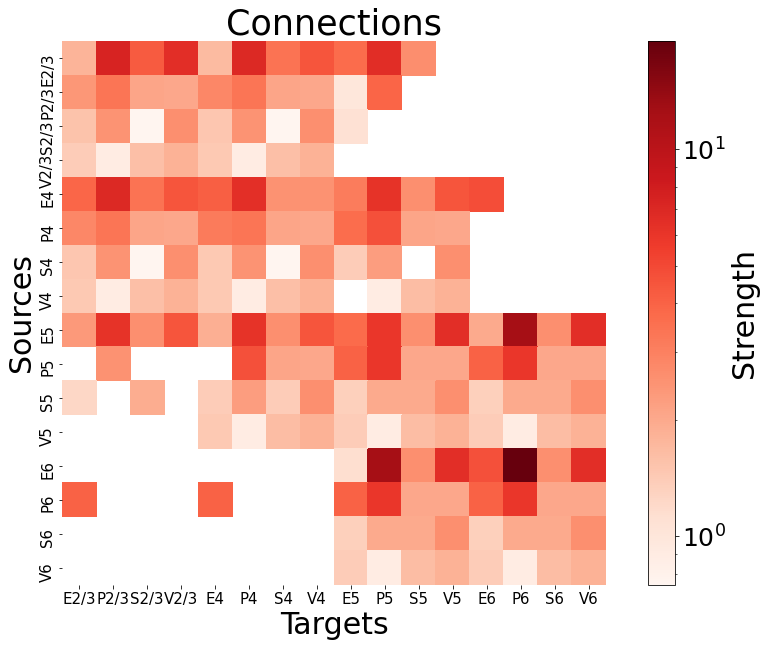

In [21]:
 #create the figure
fig,ax = plt.subplots(figsize=(15, 10))
# labels for x,y-axis
x_axis_labels = ['E2/3','P2/3','S2/3','V2/3','E4','P4','S4','V4','E5','P5','S5','V5','E6','P6','S6','V6'] 
y_axis_labels = ['E2/3','P2/3','S2/3','V2/3','E4','P4','S4','V4','E5','P5','S5','V5','E6','P6','S6','V6'] 

ax.tick_params(top=False,
       bottom=True,
       left=True,
       right=False,
       labelleft=True,
       labelbottom=True)

#Plot the matrix
mA_plot = sns.heatmap(np.array(measure_co),cbar=False,square=True,norm=LogNorm(),cmap='Reds',xticklabels=x_axis_labels, yticklabels=y_axis_labels,linewidths=0.0) # plot with heatmap
mA_plot.set_xlabel('Targets', fontsize=30)
mA_plot.set_ylabel('Sources', fontsize=30)
mA_plot.set_xticklabels(mA_plot.get_xmajorticklabels(), fontsize = 15)
mA_plot.set_yticklabels(mA_plot.get_ymajorticklabels(), fontsize = 15)

#Color bar settings
cbar = mA_plot.figure.colorbar(mA_plot.collections[0])
cbar.ax.tick_params(labelsize=25)
cbar.set_label("Strength",size=30)

#Title 
plt.title('Connections',fontsize=35)

#Save the fig
plt.savefig("IMAGES/Fig1_connections.png")
#SHow fig
plt.show(mA_plot)